In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
file_path = '/content/beveridge.xls'
df = pd.read_excel(file_path)
df = df.iloc[12:].reset_index(drop=True)
df.head()

,"Beveridge wheat price index, 1500-1869",Unnamed: 1
0,1500,17
1,1501,19
2,1502,20
3,1503,15
4,1504,13


In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.columns = ['Year', 'Price_Index']
df.set_index('Year', inplace=True)

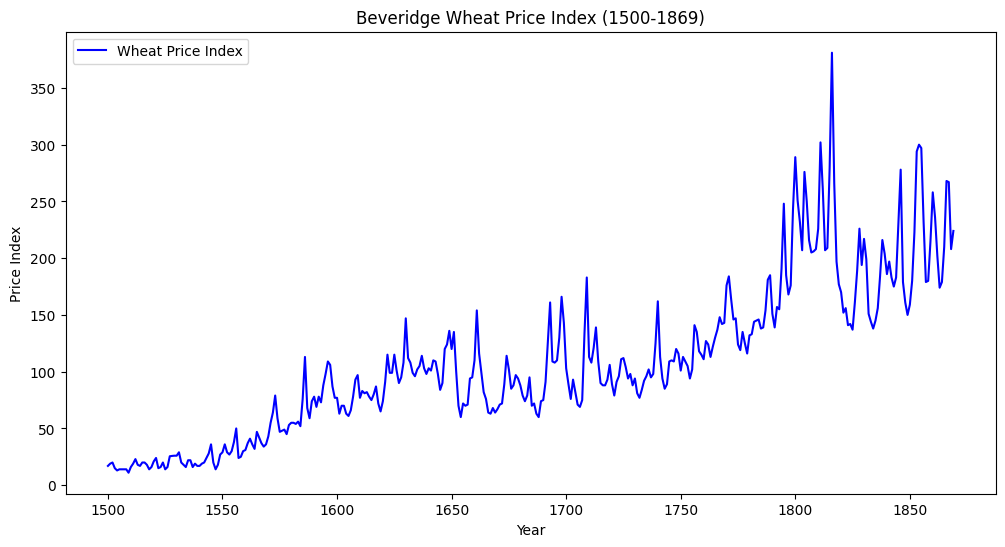

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price_Index'], label='Wheat Price Index', color='blue')
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Beveridge Wheat Price Index (1500-1869)')
plt.legend()
plt.show()

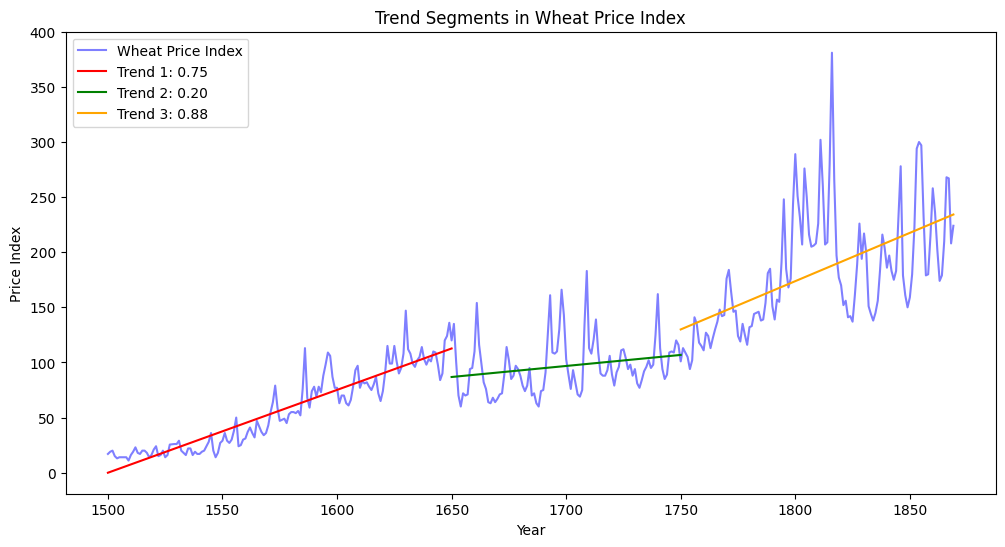

In [ ]:
segments = [(1500, 1650), (1650, 1750), (1750, 1869)]
colors = ['red', 'green', 'orange']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price_Index'], label='Wheat Price Index', color='blue', alpha=0.5)

for i, (start, end) in enumerate(segments):
    segment_data = df.loc[start:end]

    x = pd.to_numeric(segment_data.index, errors='coerce')
    y = pd.to_numeric(segment_data['Price_Index'], errors='coerce')

    valid_data = pd.DataFrame({'x': x, 'y': y}).dropna()
    slope, intercept, _, _, _ = linregress(valid_data['x'], valid_data['y'])
    trend_line = intercept + slope * segment_data.index
    plt.plot(segment_data.index, trend_line, label=f'Trend {i+1}: {slope:.2f}', color=colors[i])

plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Trend Segments in Wheat Price Index')
plt.legend()
plt.show()